In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install scikit-learn

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats



In [6]:

input_file_path = '/content/drive/MyDrive/Makine Ogrenmesi/veri-seti.txt'
output_file_path = '/content/drive/MyDrive/Makine Ogrenmesi/veri-seti_guncel.txt'

data = pd.read_csv(input_file_path, header=None, delimiter="\t")

# sütun başlıklarını belirleme
column_names = [
    'Hamile kalma sayısı',
    'Glukoz',
    'Kan basıncı',
    'Triseps',
    'İnsülini',
    'Vücut kitle indeksi',
    'Diyabet soyağacı fonksiyonu',
    'Yaş',
    'Sınıf değişkeni (0 veya 1)'
]

data.columns = column_names
data.to_csv(output_file_path, index=False, sep="\t")
print(f"Güncellenmiş veri seti '{output_file_path}' dosyasına kaydedildi.")


Güncellenmiş veri seti '/content/drive/MyDrive/Makine Ogrenmesi/veri-seti_guncel.txt' dosyasına kaydedildi.


In [7]:
data.head()

,Hamile kalma sayısı,Glukoz,Kan basıncı,Triseps,İnsülini,Vücut kitle indeksi,Diyabet soyağacı fonksiyonu,Yaş,Sınıf değişkeni (0 veya 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


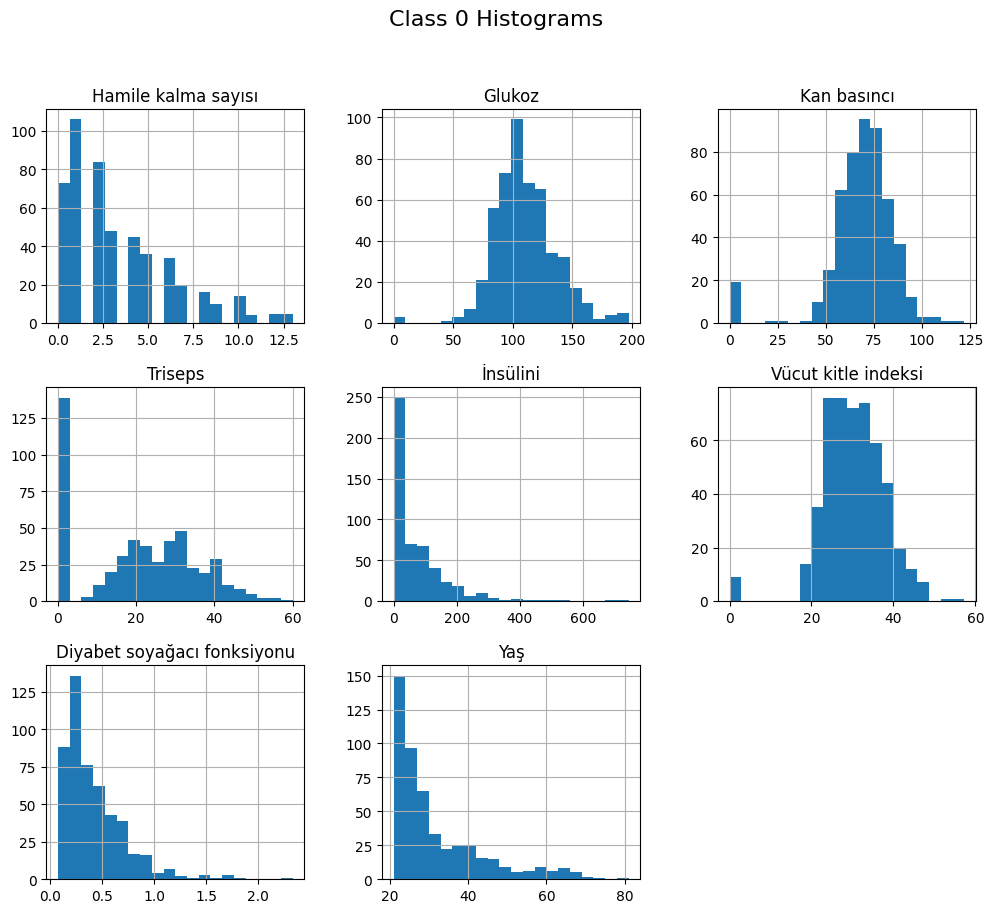

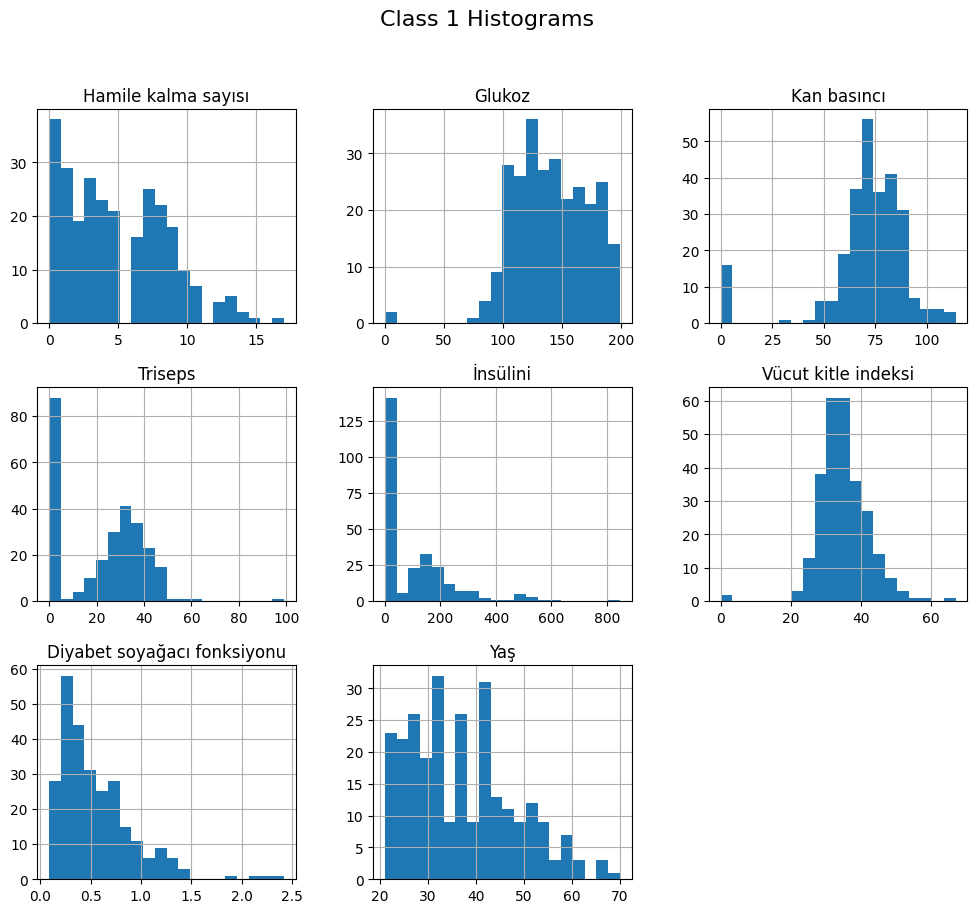

In [8]:
# Histogram oluşturma
def plot_histograms(df, class_label, columns, bins=20):
    """
    Her sınıf için histogramları oluşturur
    """
    class_df = df[df['Sınıf değişkeni (0 veya 1)'] == class_label]
    class_df[columns].hist(bins=bins, figsize=(12, 10))
    plt.suptitle(f"Class {class_label} Histograms", fontsize=16)
    plt.show()

    # Histogram oluşturulacak sütunlar
columns_to_plot = ['Hamile kalma sayısı', 'Glukoz', 'Kan basıncı', 'Triseps', 'İnsülini', 'Vücut kitle indeksi', 'Diyabet soyağacı fonksiyonu', 'Yaş']

# Sınıf 0 için histogram
plot_histograms(data, class_label=0, columns=columns_to_plot)

# Sınıf 1 için histogram
plot_histograms(data, class_label=1, columns=columns_to_plot)



In [9]:
# 0 değerleri sıfırdan farklı değerlere yakın rastgele değerlerle değiştiren fonksiyon
def replace_zeros_with_random(df, column):
    non_zero_values = df[df[column] != 0][column]
    if len(non_zero_values) > 0:
        df.loc[df[column] == 0, column] = np.random.choice(non_zero_values, size=df[df[column] == 0].shape[0], replace=True)
    return df

# 0 değerleri olan sütunları işleyin
columns_to_replace = ["Glukoz", "Kan basıncı", "Triseps", "İnsülini", "Vücut kitle indeksi"]
for column in columns_to_replace:
    data = replace_zeros_with_random(data, column)

In [10]:
data.head()


,Hamile kalma sayısı,Glukoz,Kan basıncı,Triseps,İnsülini,Vücut kitle indeksi,Diyabet soyağacı fonksiyonu,Yaş,Sınıf değişkeni (0 veya 1)
0,6,148,72,35,45,33.6,0.627,50,1
1,1,85,66,29,14,26.6,0.351,31,0
2,8,183,64,26,100,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#data.to_excel('/content/drive/MyDrive/Makine Ogrenmesi/veri_seti_updated.xlsx', index=False)

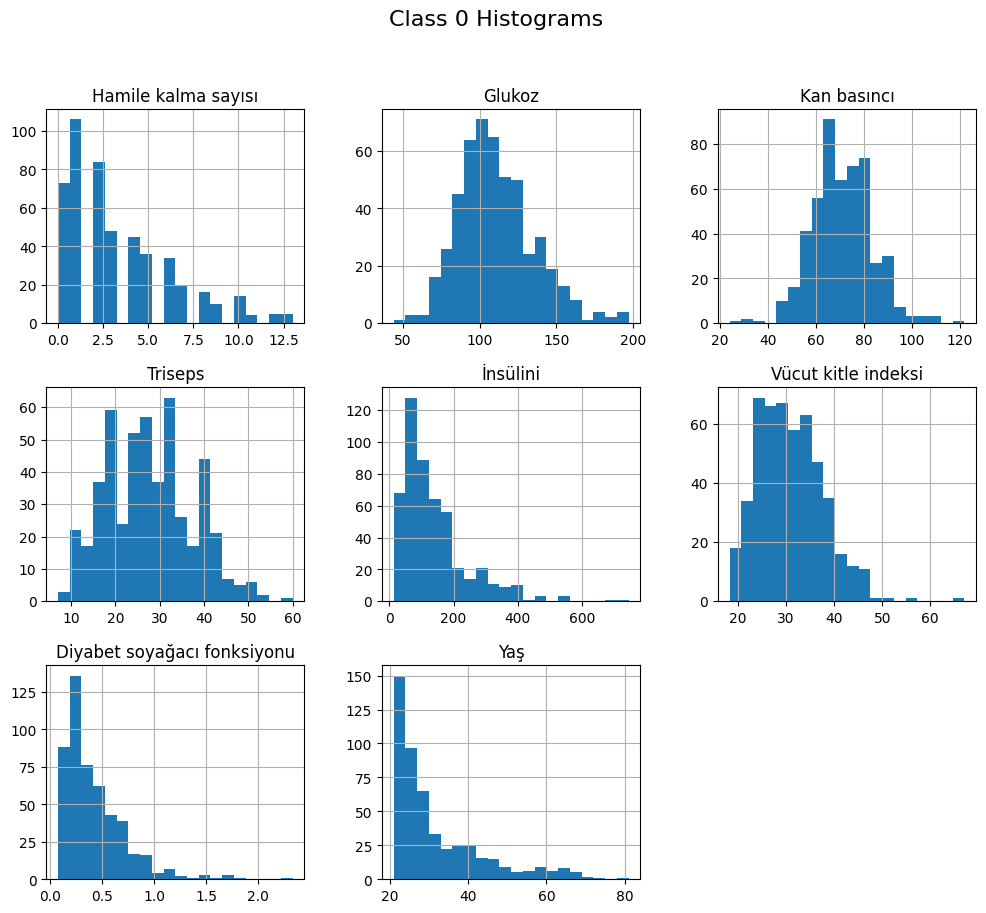

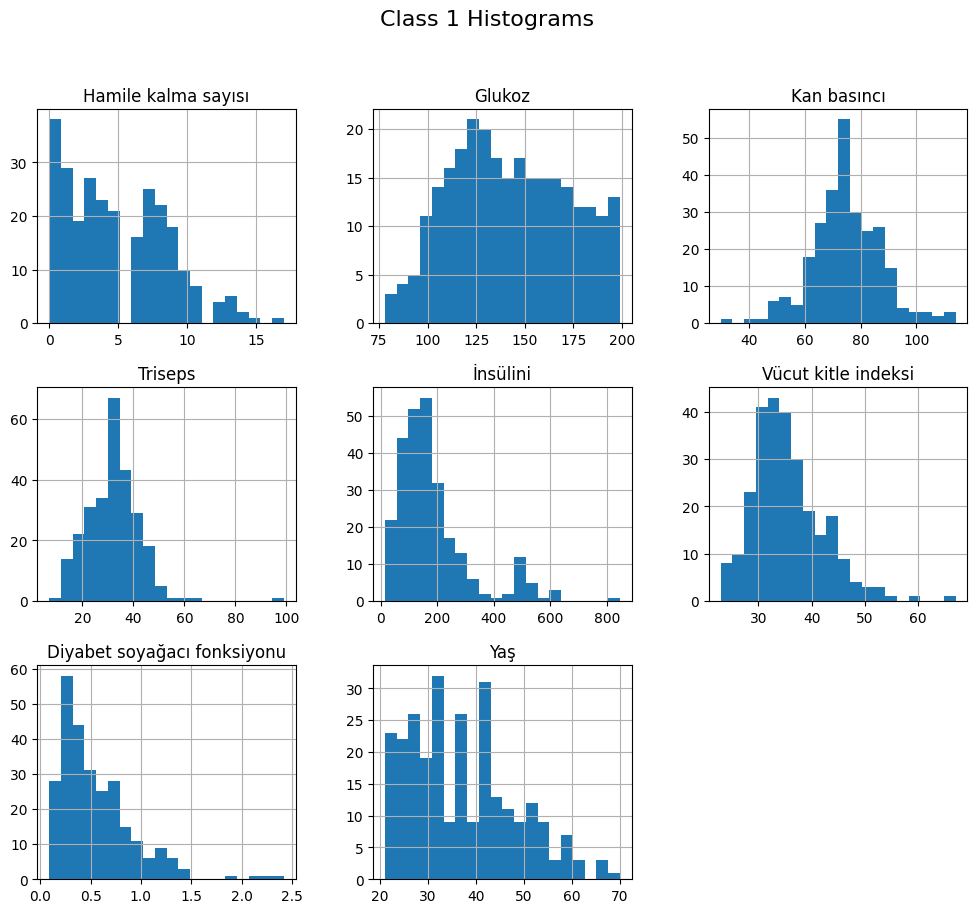

In [11]:
 # Histogram oluşturulacak sütunlar
columns_to_plot = ['Hamile kalma sayısı', 'Glukoz', 'Kan basıncı', 'Triseps', 'İnsülini', 'Vücut kitle indeksi', 'Diyabet soyağacı fonksiyonu', 'Yaş']

# Sınıf 0 için histogram
plot_histograms(data, class_label=0, columns=columns_to_plot)

# Sınıf 1 için histogram
plot_histograms(data, class_label=1, columns=columns_to_plot)

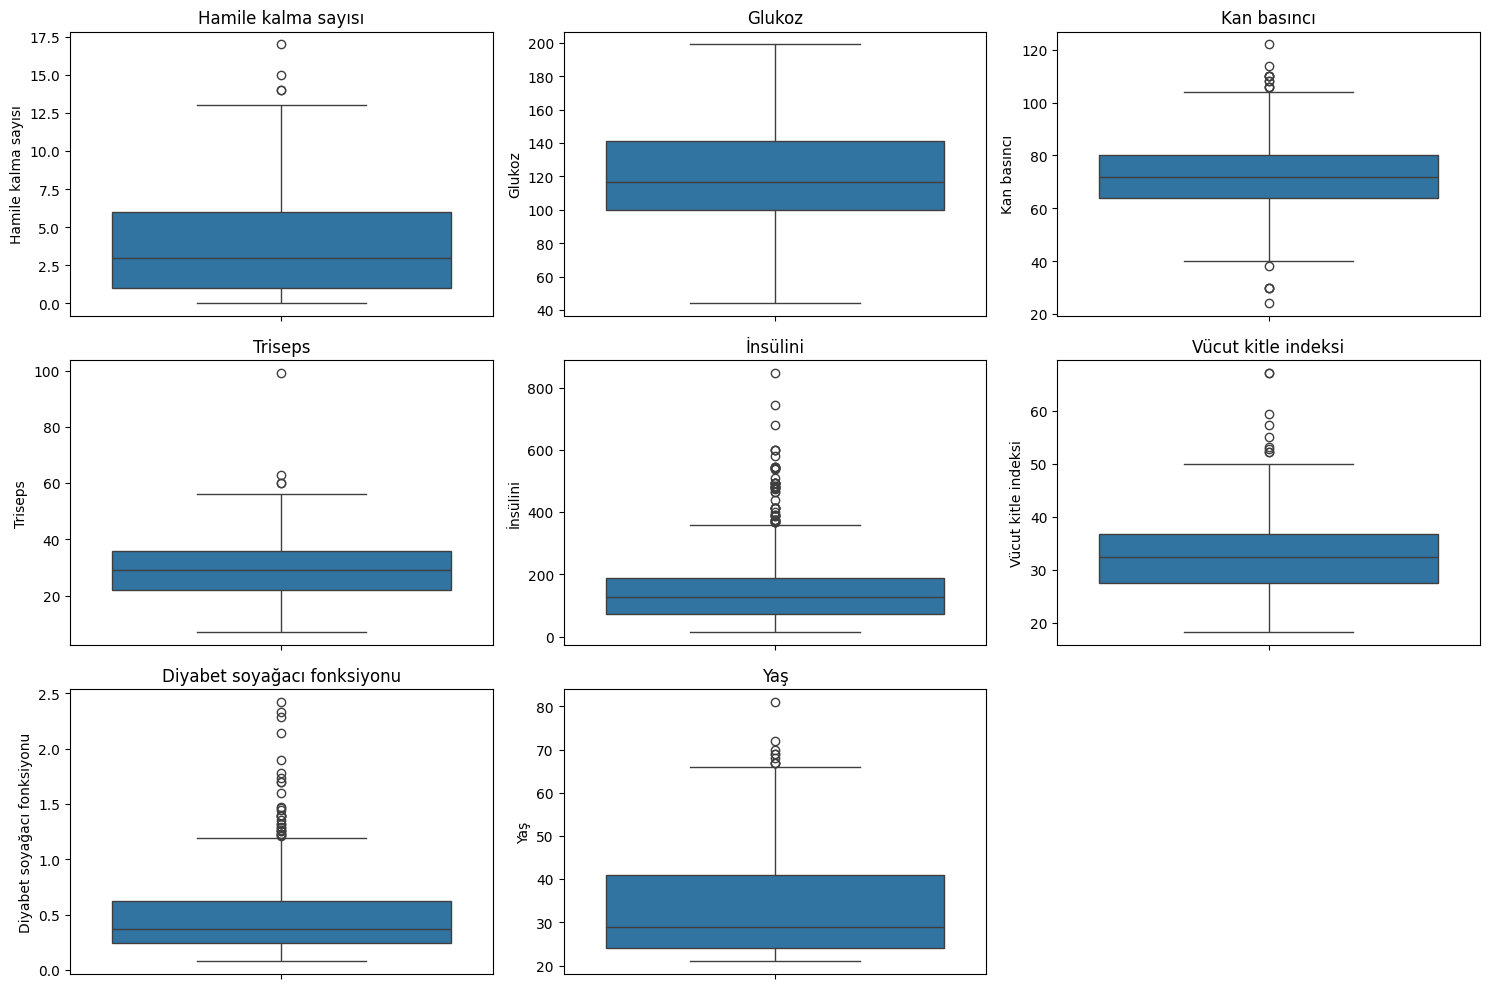

In [12]:
# Aykırı değerleri tespit etmek ve göstermek için boxplot çizimi
plt.figure(figsize=(15, 10))

# Tüm sütunlar için boxplot çizimi
for i, col in enumerate(data.columns[:-1], 1):  # Son sütun hariç, tüm sütunlar için
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
# Aykırı değerleri kontrol altına almak için Winsorize işlemi
for col in data.columns[1:-1]:
    if data[col].dtype == 'float64':
        data[col] = mstats.winsorize(data[col], limits=[0.05, 0.05])
    else:
        data[col] = mstats.winsorize(data[col], limits=[0.05, 0.05]).astype(int)

In [14]:

# Sınıfların aykırı değerlerini atmak için IQR yöntemini kullanacağız
# Aykırı değerleri temizlemek için IQR yöntemi
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Sınıf sütununa göre aykırı değerleri at
cleaned_data = remove_outliers(data)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4823: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


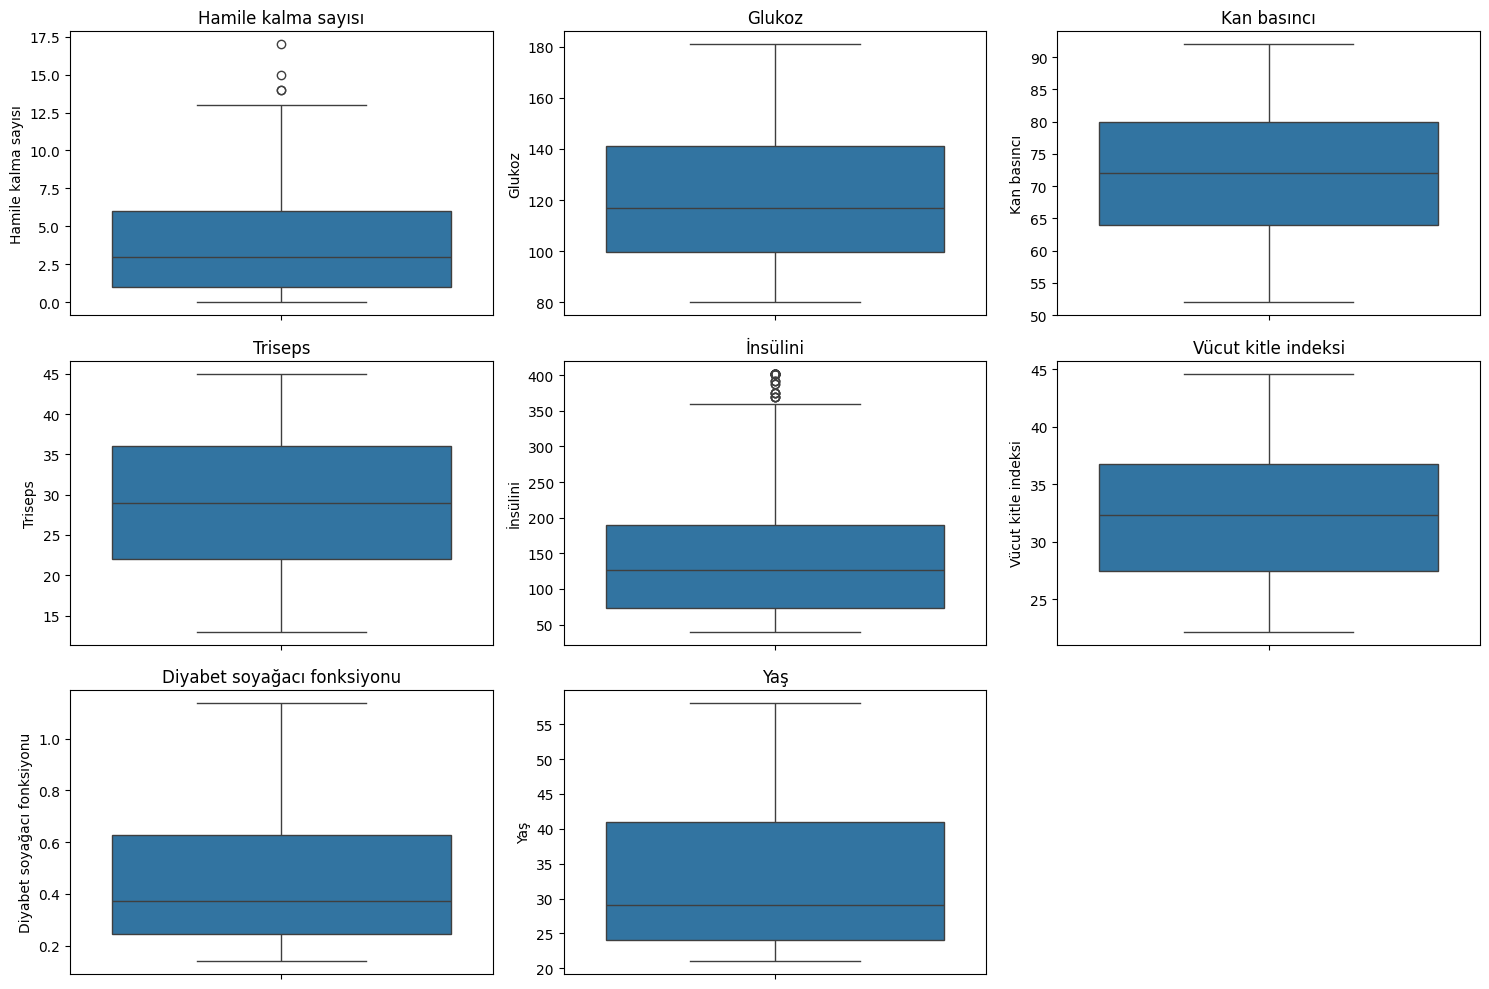

In [15]:
# Aykırı değerleri tespit etmek ve göstermek için boxplot çizimi
plt.figure(figsize=(15, 10))

# Tüm sütunlar için boxplot çizimi
for i, col in enumerate(data.columns[:-1], 1):  # Son sütun hariç, tüm sütunlar için
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [16]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [17]:
columns_to_clean = ["Hamile kalma sayısı", "İnsülini"]
for column in columns_to_clean:
    data = remove_outliers_iqr(data, column)

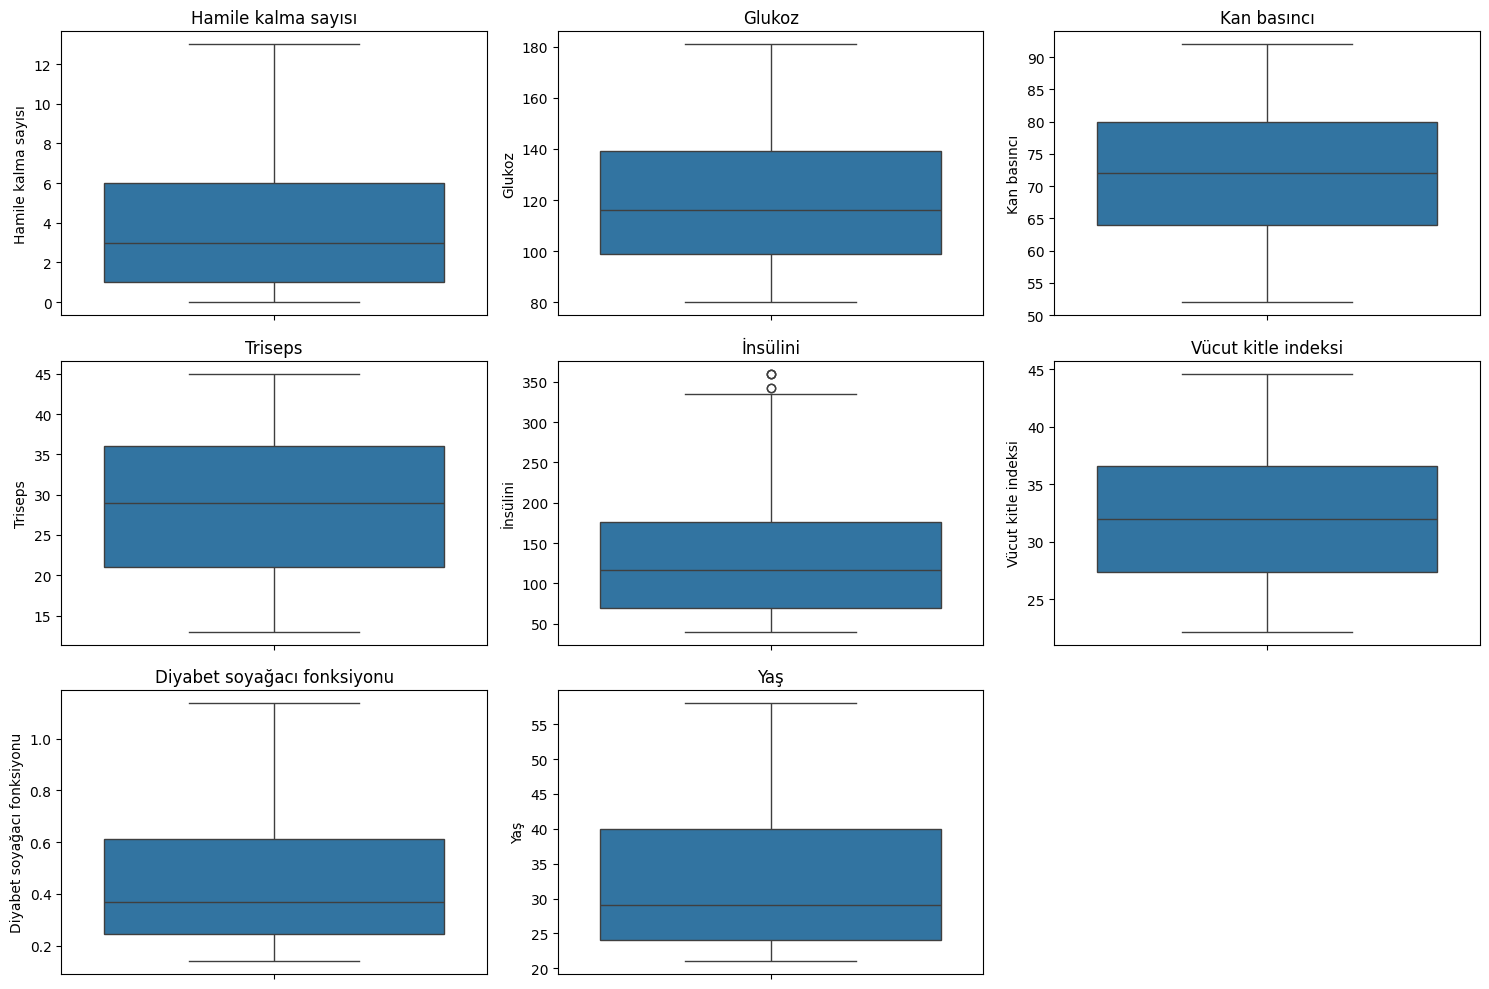

In [18]:
# Aykırı değerleri tespit etmek ve göstermek için boxplot çizimi
plt.figure(figsize=(15, 10))

# Tüm sütunlar için boxplot çizimi
for i, col in enumerate(data.columns[:-1], 1):  # Son sütun hariç, tüm sütunlar için
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [19]:
data = remove_outliers_iqr(data, "İnsülini")

In [20]:
data = remove_outliers_iqr(data, "İnsülini") #aykırı değer olduğu için tekrar çalıştırılmıştır.

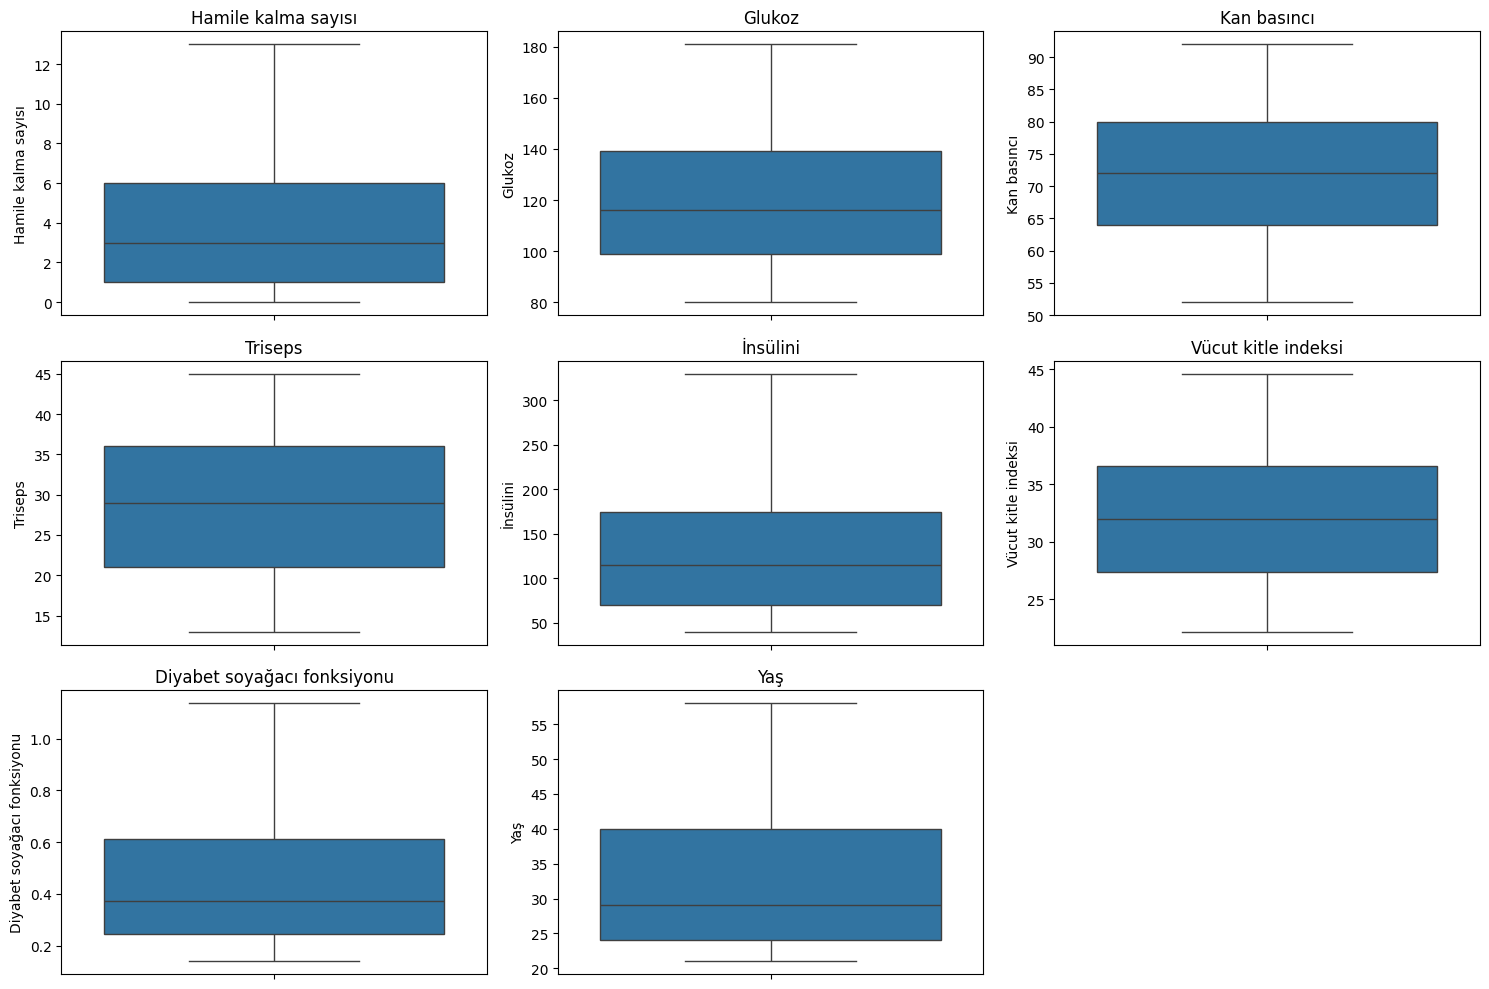

In [21]:
# Aykırı değerleri tespit etmek ve göstermek için boxplot çizimi
plt.figure(figsize=(15, 10))

# Tüm sütunlar için boxplot çizimi
for i, col in enumerate(data.columns[:-1], 1):  # Son sütun hariç, tüm sütunlar için
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
# Bağımsız ve bağımlı değişkenleri ayır
X = data.drop(columns=["Sınıf değişkeni (0 veya 1)"])
y = data["Sınıf değişkeni (0 veya 1)"]

# Veriyi %70 eğitim ve %30 test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verileri ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Naive** **Bayes**

In [23]:
# Naive Bayes sınıflandırıcısını uygulama
nb = GaussianNB()
nb.fit(X_train, y_train)

# Tahmin yapma
y_pred = nb.predict(X_test)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# Confusion matrix oluşturma
cm_naive = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7230046948356808
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       141
           1       0.59      0.61      0.60        72

    accuracy                           0.72       213
   macro avg       0.69      0.70      0.69       213
weighted avg       0.73      0.72      0.72       213



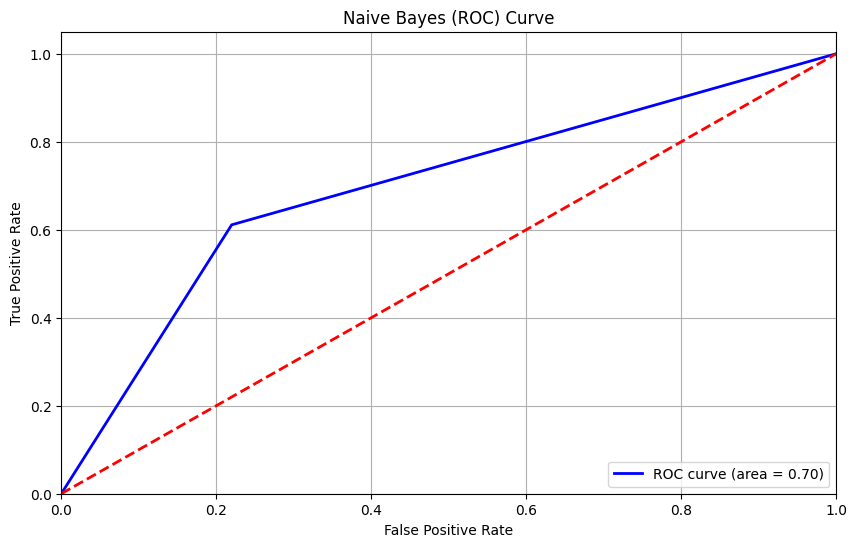

In [24]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# ROC eğrisini çizme
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

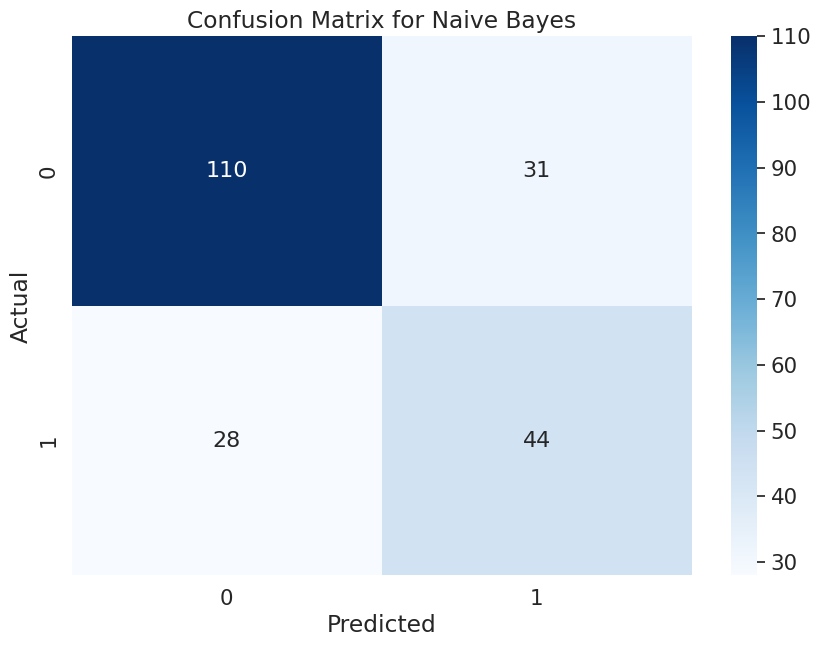

In [25]:
def plot_confusion_matrix(cm, model_name):
    df_cm = pd.DataFrame(cm, index=["0", "1"], columns=["0", "1"])
    plt.figure(figsize=(10, 7))
    sns.set(font_scale=1.4)  # For label size
    sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d', annot_kws={"size": 16})  # Font size
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


plot_confusion_matrix(cm_naive, "Naive Bayes")

# **K-en Yakın Komşuluk**

In [26]:
# K-en yakın komşuluk sınıflandırıcısı için parametre aralığını belirleme
param_grid = {'n_neighbors': range(1, 31)}

# GridSearchCV ile en iyi k değerini belirleme
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi k değerini elde etme
best_k = grid_search.best_params_['n_neighbors']

# En iyi k değeri ile KNN modelini eğitme
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yapma
y_pred_knn = best_knn.predict(X_test)

# Sonuçları değerlendirme
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Confusion matrix oluşturma
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"En iyi k değeri: {best_k}")
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(report_knn)

En iyi k değeri: 13
Accuracy: 0.7464788732394366
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       141
           1       0.67      0.50      0.57        72

    accuracy                           0.75       213
   macro avg       0.72      0.69      0.70       213
weighted avg       0.74      0.75      0.74       213



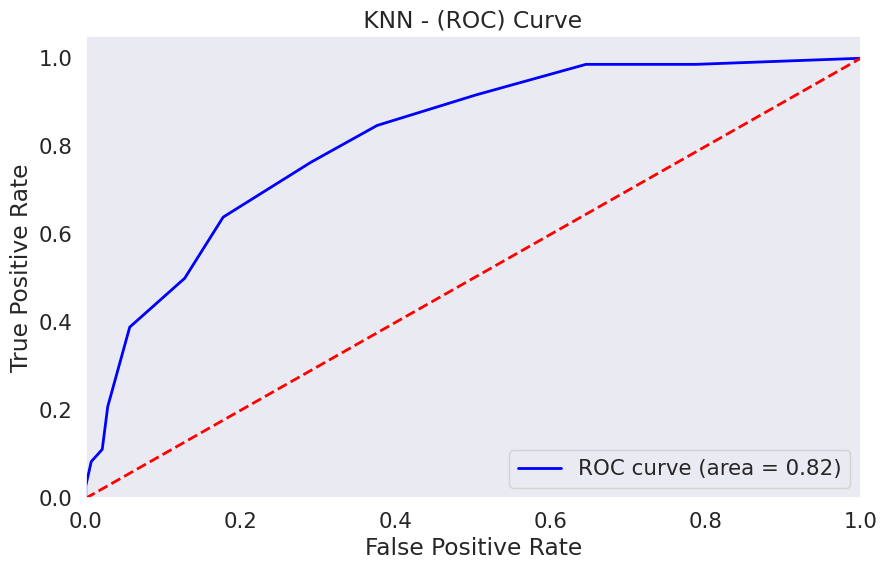

In [27]:
# ROC eğrisi için tahmin olasılıklarını hesaplama
y_prob_knn = best_knn.predict_proba(X_test)[:, 1]

# ROC eğrisi verilerini hesaplama
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

# Precision-recall eğrisi verilerini hesapla
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_knn)
pr_auc = auc(recall, precision)

# ROC eğrisi çizme
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' KNN - (ROC) Curve ')
plt.legend(loc="lower right")
plt.grid()
plt.show()


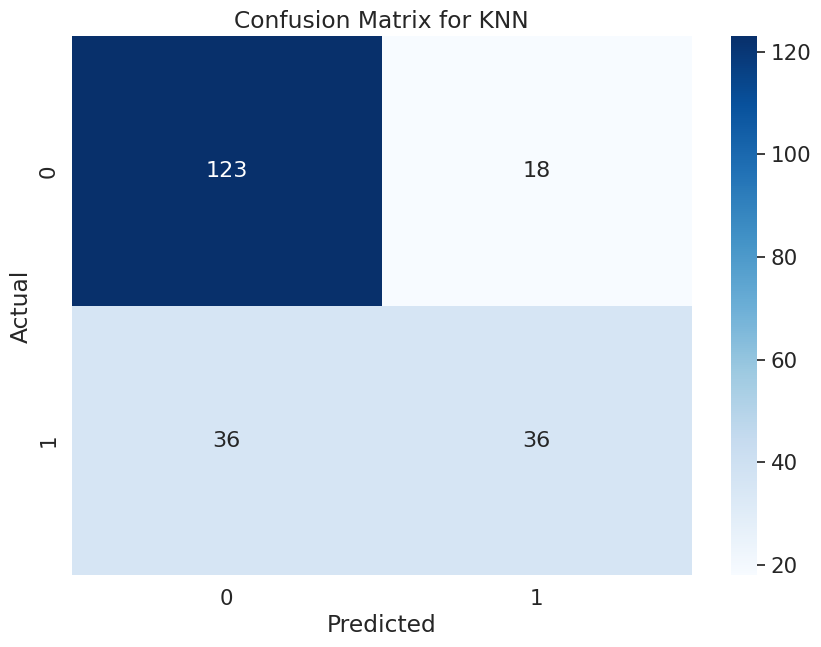

In [28]:
plot_confusion_matrix(cm_knn, "KNN")


# **Multi-Layer Perceptron (MLP)**

In [29]:
# MLP sınıflandırıcısını uygulama
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Tahmin yapma
y_pred_mlp = mlp.predict(X_test)

# Sonuçları değerlendirme
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
report_mlp = classification_report(y_test, y_pred_mlp)

# Confusion matrix oluşturma
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Sonuçları yazdırma

print(f"MLP Accuracy: {accuracy_mlp}")
print("MLP Classification Report:")
print(report_mlp)






MLP Accuracy: 0.7276995305164319
MLP Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       141
           1       0.60      0.60      0.60        72

    accuracy                           0.73       213
   macro avg       0.70      0.70      0.70       213
weighted avg       0.73      0.73      0.73       213



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


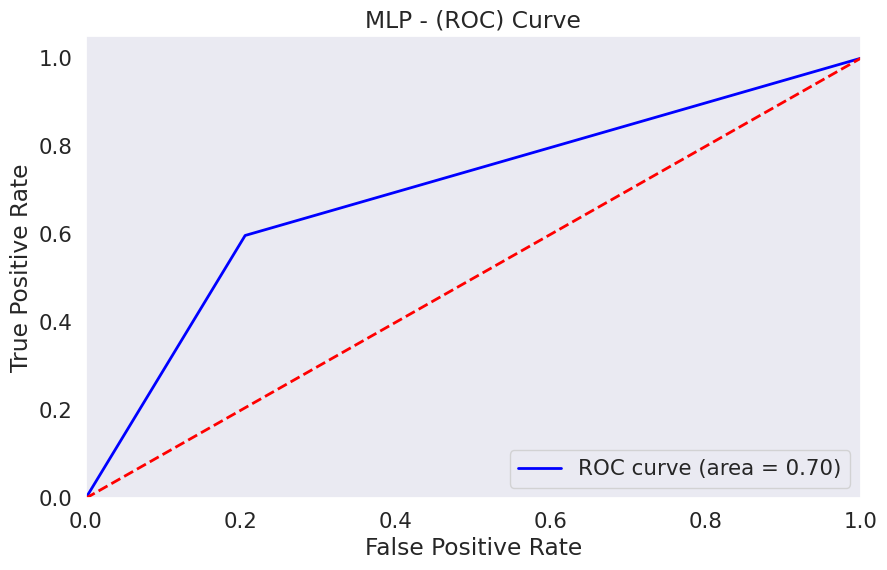

In [30]:
fpr_mlp, tpr_mlp, thresholds_mpl = roc_curve(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_mlp)

# ROC eğrisini çizme
plt.figure(figsize=(10, 6))
plt.plot(fpr_mlp, tpr_mlp, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP - (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

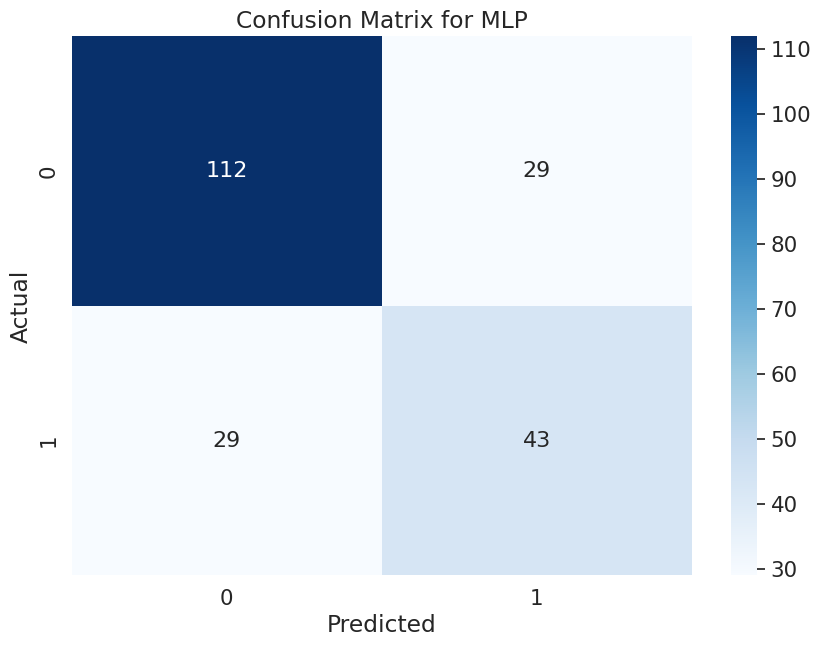

In [31]:
plot_confusion_matrix(cm_mlp, "MLP")

# **Support Vector Machines (SVM)**

In [32]:
# SVM sınıflandırıcısını uygulama
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)

# Tahmin yapma
y_pred_svm = svm.predict(X_test)

# Sonuçları değerlendirme
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Confusion matrix oluşturma
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Sonuçları yazdırma
print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(report_svm)

SVM Accuracy: 0.7746478873239436
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       141
           1       0.69      0.61      0.65        72

    accuracy                           0.77       213
   macro avg       0.75      0.73      0.74       213
weighted avg       0.77      0.77      0.77       213



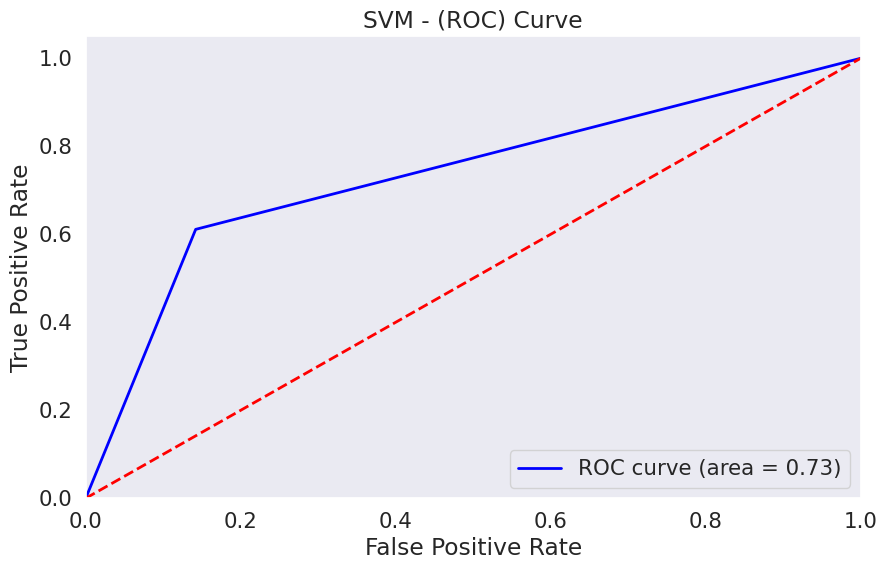

In [33]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

# ROC eğrisini çizme
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM - (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

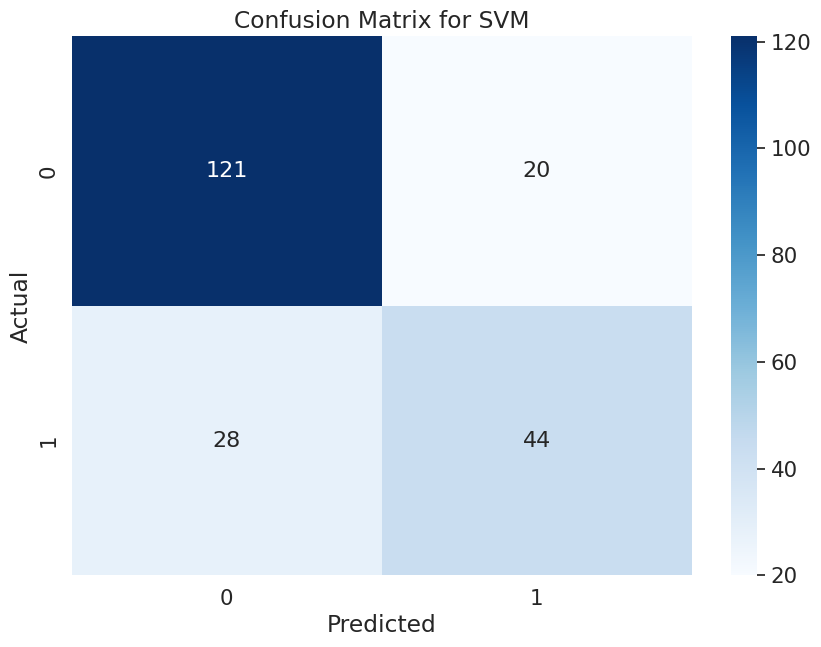

In [34]:
plot_confusion_matrix(cm_svm, "SVM")

In [36]:
def plot_roc_curve(y_test, y_pred, model_name):
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# **Sınıflandırma Yöntemlerin Karşılaştırması**

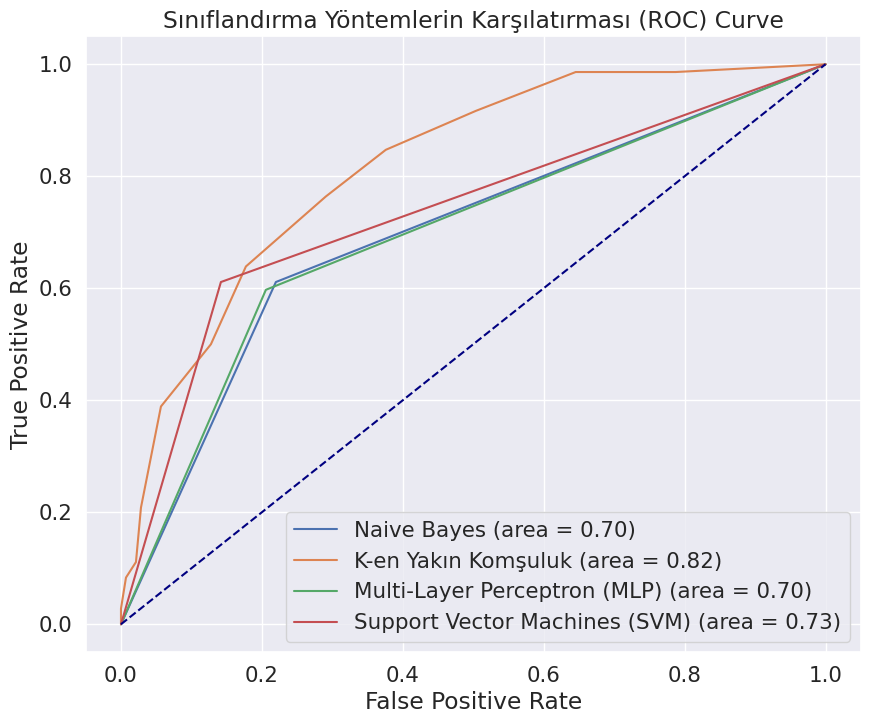

In [38]:
plt.figure(figsize=(10, 8))
plot_roc_curve(y_test,  y_pred, 'Naive Bayes')
plot_roc_curve(y_test, y_prob_knn, 'K-en Yakın Komşuluk')
plot_roc_curve(y_test, y_pred_mlp, 'Multi-Layer Perceptron (MLP)')
plot_roc_curve(y_test, y_pred_svm, 'Support Vector Machines (SVM)')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sınıflandırma Yöntemlerin Karşılatırması (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



